In [1]:
from util import *
import torch

# DistMult

# (1) Forward Pass

In [2]:
# (1) One-dimensional entity/subject embedding 
s = Value(1.3, label='s')
# (2) One-dimensional relation/predicate embedding 
p = Value(0.9, label='p')
# (2) One-dimensional entity/object embedding 
o = Value(1.4, label='o')
sp = s*p; sp.label = 'sp'
spo = sp * o; spo.label = 'spo'

# Unnormalized log-likeihood of a triple being an element of a KG
print(spo)
yhat = spo.sigmoid(); yhat.label = 'yhat'
# prediction
print(yhat)

Value(data=1.6380000000000001)
Value(data=0.837262613340254)


## Wikipedia: Cross Entropy Loss $$ \mathcal L(p,q) = - \sum_{x \in X }p(x) log q(x),$$

The cross-entropy between two probability distributions p and q over the same underlying set of events measures the average number of bits needed to identify an event drawn from the set if a coding scheme used for the set is optimized for an estimated probability distribution q, rather than the true distribution p.
https://en.wikipedia.org/wiki/Cross_entropy

### $$ \mathcal L(y,\hat{y}) = -y\log(\hat{y}_i)-(1-y)\log(1-\hat{y}) $$
where $y, \hat{y} \in [0,1] $ 

# Derivative of BCE w.r.t. $\hat y$

###  $$ \frac{\partial \mathcal L}{\partial \hat y} = \frac{\hat y - y}{\hat y (1-\hat y)}$$

# (2) Compute Loss and Backprogate Gradients

In [3]:
def bce(y,yhat):
    loss=-y*math.log(yhat) - (1-y)* math.log(1-yhat)
    grad = (yhat -y) / (yhat * (1-yhat))
    return loss,grad

In [4]:
loss, grad = bce(y=0.0,yhat=yhat.data)
loss, grad

(1.8156175022194463, 6.144869476679113)

In [5]:
# Bacprogate gradients
yhat.backward(grad)

# Visualize (1-3)

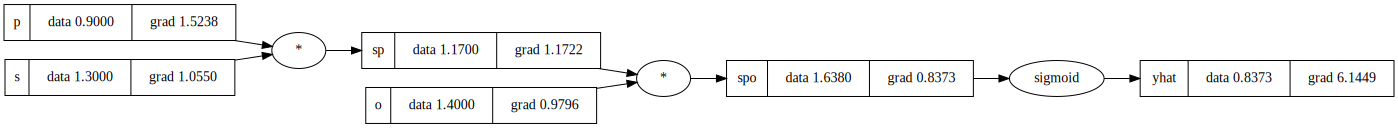

In [6]:
draw_dot(yhat)

In [7]:
# Sanity Checking with Pytorch
# Loss
print(bce(y=1.0,yhat=yhat.data))
def torch_checking_pos():
    # Torch Checking
    torch_yhat=torch.tensor(yhat.data,requires_grad=True)
    loss=torch.nn.functional.binary_cross_entropy(torch_yhat, torch.tensor(1.0))
    loss.backward()
    return loss.item(),torch_yhat.grad.item()
print(torch_checking_pos())

# Loss
print(bce(y=0.0,yhat=yhat.data))
def torch_checking_pos():
    # Torch Checking
    torch_yhat=torch.tensor(yhat.data,requires_grad=True)
    loss=torch.nn.functional.binary_cross_entropy(torch_yhat, torch.tensor(0.0))
    loss.backward()
    return loss.item(),torch_yhat.grad.item()
print(torch_checking_pos())

(0.17761750221944606, -1.1943683905943276)
(0.17761747539043427, -1.1943683624267578)
(1.8156175022194463, 6.144869476679113)
(1.815617561340332, 6.144869804382324)


# Update Parameters/Embeddings

In [8]:
lr= 1.0
# (1) Update Subject Embeddings.
s.data = s.data -lr*s.grad
# (2) Update Predicate/Relation Embeddings.
p.data = p.data -lr*p.grad
# (3) Update Object Embeddings.
o.data = o.data-lr*o.grad

# Prediction again

In [9]:
sp = s*p
spo = sp * o
yhat = spo.sigmoid()


In [10]:
# Yay!!! Loss is decreased :)
bce(y=0.0,yhat=yhat.data)

(0.6615306955410633, 1.937756180195256)